# IS 362 - Auto MPG EDA

John Moon <br>
Prof. Cohen <br>
IS 362 - Data Acquisition Management <br>
Oct. 17, 2025 <br>

Reproducible workflow using the UCI Auto MPG dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

data_path = Path('auto-mpg.data')

rows = []
with open(data_path, 'r', encoding='utf-8', errors='ignore') as f:
    for line in f:
        if not line.strip():
            continue
        parts = line.strip().split()
        head = parts[:8]
        tail = parts[8:]
        car_name = ' '.join(tail)
        rows.append(head + [car_name])

cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df = pd.DataFrame(rows, columns=cols)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.,10.5,70,1,"""ford torino"""


## Cleaning
- Replace `?` in `horsepower` with missing values and convert to numeric.
- Map origin codes 1/2/3 to `USA/Asia/Europe`.
- Convert quantitative columns to numeric.

In [2]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)
for c in ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']:
    df[c] = pd.to_numeric(df[c], errors='coerce')
origin_map = {1:'USA',2:'Asia',3:'Europe'}
df['origin'] = df['origin'].map(origin_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.1+ KB


## Figures

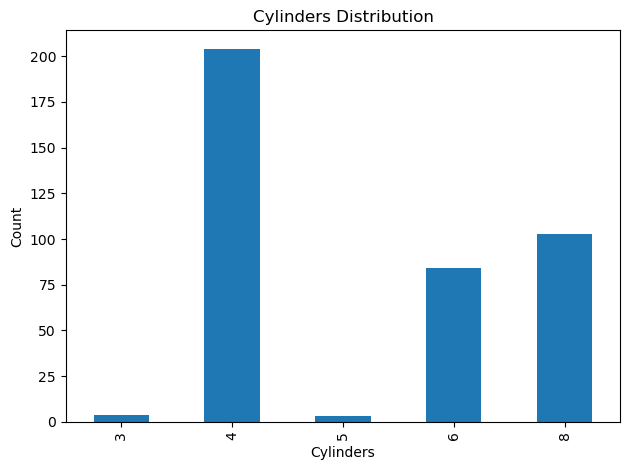

In [3]:
df['cylinders'].value_counts().sort_index().plot(kind='bar')
plt.title('Cylinders Distribution')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.tight_layout(); plt.show()

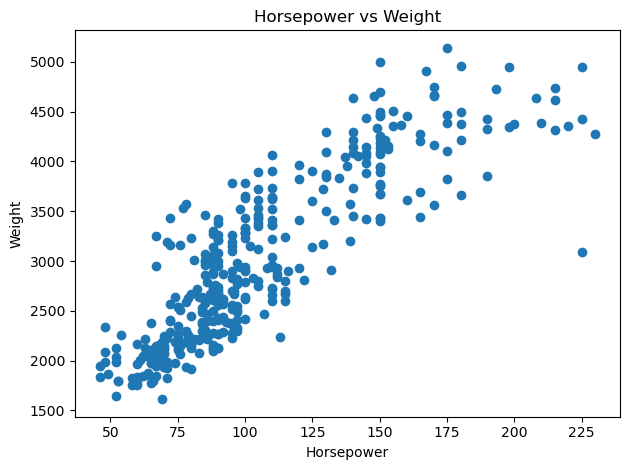

In [4]:
hpw = df.dropna(subset=['horsepower'])
plt.scatter(hpw['horsepower'], hpw['weight'])
plt.title('Horsepower vs Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.tight_layout(); plt.show()

## Extra question
How does fuel economy (MPG) vary across cylinder counts?

C:\Users\John\AppData\Local\Temp\ipykernel_2168\3703810897.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showmeans=True)


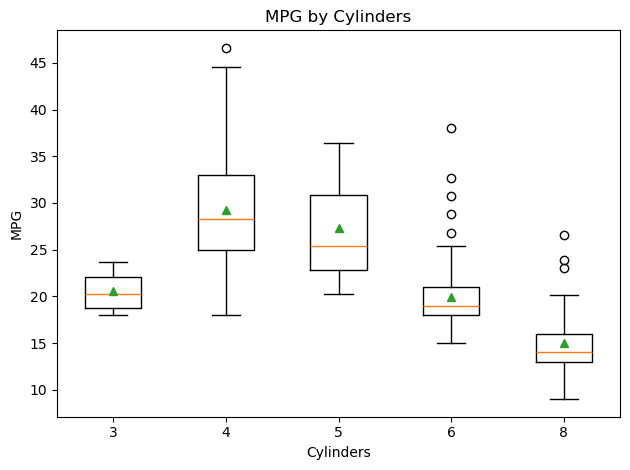

In [5]:
groups = [g['mpg'].dropna().values for _, g in df.groupby('cylinders')]
labels = [str(int(k)) for k in sorted(df['cylinders'].dropna().unique())]
plt.boxplot(groups, labels=labels, showmeans=True)
plt.title('MPG by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.tight_layout(); plt.show()

## To save cleaned CSV

In [6]:
df.to_csv('auto_mpg_clean.csv', index=False)
len(df)

398